<a href="https://colab.research.google.com/github/SaumilShah-7/Dog-Breed-Identification-Kaggle/blob/master/Dog_Breed_Identification_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import PIL
import os
import shutil

2.0.0-rc2


In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c dog-breed-identification

  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 32.6MB/s]
  0% 0.00/281k [00:00<?, ?B/s]
100% 281k/281k [00:00<00:00, 84.3MB/s]
 98% 340M/346M [00:02<00:00, 162MB/s]
100% 346M/346M [00:02<00:00, 152MB/s]
100% 345M/345M [00:02<00:00, 164MB/s]



In [0]:
!unzip -q train.zip
!unzip -q test.zip
!unzip -q labels.csv.zip
!rm train.zip
!rm test.zip
!rm labels.csv.zip

In [0]:
for index, row in y_df.iterrows():
  if not os.path.exists("images/"+str(row["breed"])):
    os.makedirs("images/"+str(row["breed"]))
  shutil.copy("train/"+str(row["id"])+".jpg", "images/"+str(row["breed"]))    

10222

In [0]:
y_df = pd.read_csv('labels.csv')

# print(y_df['breed'].value_counts())

y_breed = np.asarray(y_df['breed']).reshape(-1, 1)
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y_breed)

labels_mapping = {np.argmax(y[i]): y_df.loc[i,'breed'] for i in range(len(y))}

image_height = 224
image_width = 224

x = []
for i in y_df['id']:
  image = cv2.imread('/content/train/'+i+'.jpg')
  x.append(cv2.resize(image, (image_height, image_width)))
x = np.asarray(x)

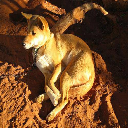

(128, 128, 3) ['dingo']


In [0]:
from google.colab.patches import cv2_imshow

cv2_imshow(x[1])
print(x[1].shape, y_breed[1])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9199, 128, 128, 3) (1023, 128, 128, 3) (9199, 120) (1023, 120)


In [0]:
mean = np.mean(x_train, axis=0)
std_dev = np.std(x_train, axis=0)

x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

x_train-=mean
x_train/=std_dev

x_test-=mean
x_test/=std_dev

In [0]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, 
                             horizontal_flip=True, fill_mode="nearest")

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(image_width, image_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=120, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

Epoch 1/100
71/71 [============================>.] - ETA: 0s - loss: 4.7537 - accuracy: 0.0145
Epoch 00001: val_accuracy improved from -inf to 0.02902, saving model to best_model.h5
72/71 [==============================] - 38s 530ms/step - loss: 4.7526 - accuracy: 0.0151 - val_loss: 4.6486 - val_accuracy: 0.0290
Epoch 2/100
71/71 [============================>.] - ETA: 0s - loss: 4.6177 - accuracy: 0.0271
Epoch 00002: val_accuracy improved from 0.02902 to 0.03978, saving model to best_model.h5
72/71 [==============================] - 36s 499ms/step - loss: 4.6178 - accuracy: 0.0270 - val_loss: 4.4910 - val_accuracy: 0.0398
Epoch 3/100
71/71 [============================>.] - ETA: 0s - loss: 4.5023 - accuracy: 0.0359
Epoch 00003: val_accuracy improved from 0.03978 to 0.04304, saving model to best_model.h5
72/71 [==============================] - 36s 502ms/step - loss: 4.5015 - accuracy: 0.0358 - val_loss: 4.3910 - val_accuracy: 0.0430
Epoch 4/100
71/71 [============================>.] -

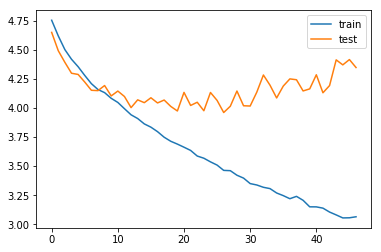

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

bs = 100

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=bs), validation_data=(x_test, y_test), 
                              steps_per_epoch=len(x_train)/bs, epochs=100, callbacks=[es, mc])
saved_model = load_model('best_model.h5')

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()